## # Data Encoding - Target Guided Nominal Encoding

It is a technique used to encode categorical variables based on their relationship with the target variable. This encoding technique is useful when we have a categorical variable with a large no. of unique categories, and we want to use this variable as a feature in our machine learning model.

In Target Guided Ordinal Encoding, we replace each category in the categorical variable with a numerical value based on the mean or median of the target variable for that category. This creates a monotonic relationship between the categorical variable and the target variable, which can improve the predictive power of our model.

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

In [2]:
df_01 = pd.DataFrame({
    "City" : ["Hyderabad", "Banglore", "Kolkota", "Delhi", "Chennai", "Hyderabad", "Kolkota"],
    "Price" : [150, 300, 200, 250, 180, 180, 240]
})

In [3]:
df_01.head()

,City,Price
0,Hyderabad,150
1,Banglore,300
2,Kolkota,200
3,Delhi,250
4,Chennai,180


### Step-01: GroupBy Function

In [4]:
df_01.groupby("City")["Price"].mean()

City
Banglore     300.0
Chennai      180.0
Delhi        250.0
Hyderabad    165.0
Kolkota      220.0
Name: Price, dtype: float64

In [5]:
mean_price = df_01.groupby("City")["Price"].mean().to_dict()

In [6]:
print(mean_price)

{'Banglore': 300.0, 'Chennai': 180.0, 'Delhi': 250.0, 'Hyderabad': 165.0, 'Kolkota': 220.0}


### Step-02: Map Function

In [7]:
df_01["Encoded"] = df_01["City"].map(mean_price)

In [8]:
df_01.head()

,City,Price,Encoded
0,Hyderabad,150,165.0
1,Banglore,300,300.0
2,Kolkota,200,220.0
3,Delhi,250,250.0
4,Chennai,180,180.0


### Step-03: Import Seaborn Datasets

In [9]:
df_01 = sns.load_dataset("tips")

In [10]:
df_01.head()

,total_bill,tip,sex,smoker,day,time,size
0,16.99,1.01,Female,No,Sun,Dinner,2
1,10.34,1.66,Male,No,Sun,Dinner,3
2,21.01,3.50,Male,No,Sun,Dinner,3
3,23.68,3.31,Male,No,Sun,Dinner,2
4,24.59,3.61,Female,No,Sun,Dinner,4


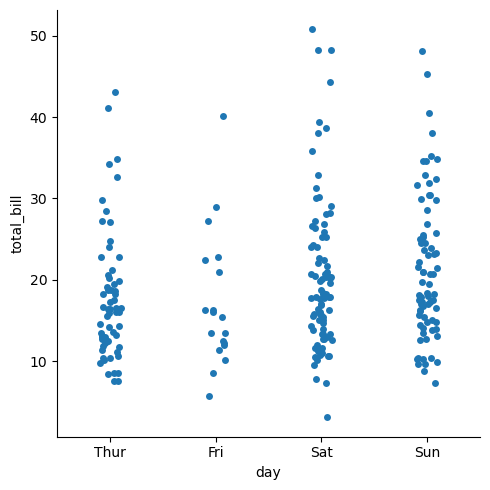

In [11]:
sns.catplot(x = "day", y = "total_bill", data = df_01)

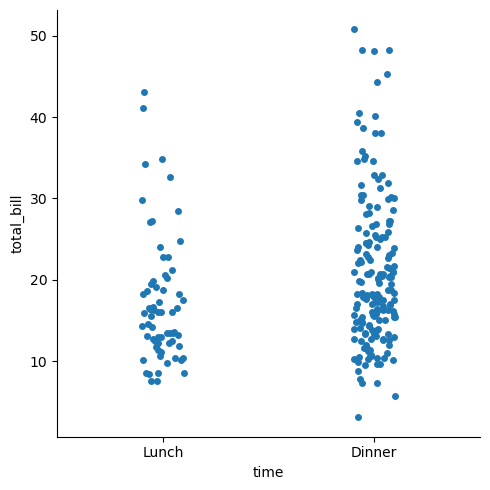

In [12]:
sns.catplot(x = "time", y = "total_bill", data = df_01)

In [13]:
day_mean = df_01.groupby("day")["total_bill"].mean().to_dict()

In [14]:
time_mean = df_01.groupby("time")["total_bill"].mean().to_dict()

In [15]:
print(day_mean)
print(time_mean)

{'Thur': 17.682741935483868, 'Fri': 17.15157894736842, 'Sat': 20.44137931034483, 'Sun': 21.41}
{'Lunch': 17.168676470588235, 'Dinner': 20.79715909090909}


In [16]:
df_01["day_encoded"] = df_01["day"].map(day_mean)
df_01["time_encoded"] = df_01["time"].map(time_mean)

In [17]:
df_01.head()

,total_bill,tip,sex,smoker,day,time,size,day_encoded,time_encoded
0,16.99,1.01,Female,No,Sun,Dinner,2,21.41,20.797159
1,10.34,1.66,Male,No,Sun,Dinner,3,21.41,20.797159
2,21.01,3.50,Male,No,Sun,Dinner,3,21.41,20.797159
3,23.68,3.31,Male,No,Sun,Dinner,2,21.41,20.797159
4,24.59,3.61,Female,No,Sun,Dinner,4,21.41,20.797159
